In [1]:
import pandas as pd
import json
import requests
from api_keys import crime_api_key
from pprint import pprint
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("NIBRS_incident_2017.csv")
data.head()

,DATA_YEAR,AGENCY_ID,INCIDENT_ID,NIBRS_MONTH_ID,CARGO_THEFT_FLAG,SUBMISSION_DATE,INCIDENT_DATE,REPORT_DATE_FLAG,INCIDENT_HOUR,CLEARED_EXCEPT_ID,CLEARED_EXCEPT_DATE,INCIDENT_STATUS,DATA_HOME,ORIG_FORMAT,DID
0,2017,19607,91852190,7680777,NaN,17-AUG-18,04-SEP-17,NaN,15.0,6,NaN,0,C,F,9353332
1,2017,19607,91852201,7680778,NaN,17-AUG-18,24-OCT-17,NaN,2.0,6,NaN,0,C,F,9353345
2,2017,19607,91852177,7680778,NaN,17-AUG-18,03-OCT-17,NaN,1.0,6,NaN,0,C,F,9353337
3,2017,19607,91852178,7680777,NaN,17-AUG-18,04-SEP-17,NaN,15.0,6,NaN,0,C,F,9353334
4,2017,19607,91852200,7680779,NaN,17-AUG-18,03-NOV-17,NaN,13.0,6,NaN,0,C,F,9353353


In [26]:
cropped = data[["INCIDENT_DATE","AGENCY_ID"]]
cropped.head()

,INCIDENT_DATE,AGENCY_ID
0,04-SEP-17,19607
1,24-OCT-17,19607
2,03-OCT-17,19607
3,04-SEP-17,19607
4,03-NOV-17,19607


In [27]:
cropped['INCIDENT_DATE'] = pd.to_datetime(cropped['INCIDENT_DATE'])
cropped.head()

C:\Users\Oleg\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,INCIDENT_DATE,AGENCY_ID
0,2017-09-04,19607
1,2017-10-24,19607
2,2017-10-03,19607
3,2017-09-04,19607
4,2017-11-03,19607


In [30]:
cropped["month"] = pd.DatetimeIndex(cropped["INCIDENT_DATE"]).month
cropped.head()

C:\Users\Oleg\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,INCIDENT_DATE,AGENCY_ID,month
0,2017-09-04,19607,9
1,2017-10-24,19607,10
2,2017-10-03,19607,10
3,2017-09-04,19607,9
4,2017-11-03,19607,11


In [36]:
cropped = cropped.drop("INCIDENT_DATE",1)

In [38]:
cropped = cropped.drop("AGENCY_ID",1)

In [40]:
cropped_plot = cropped.groupby("month").month.count()
cropped_plot

month
1     20821
2     18990
3     21152
4     21246
5     23415
6     22743
7     23315
8     22854
9     22618
10    23685
11    24599
12    24147
Name: month, dtype: int64

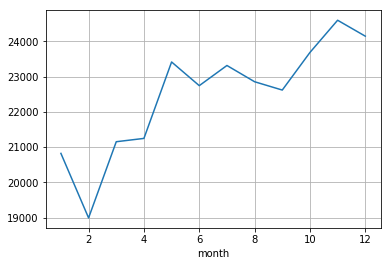

In [42]:
cropped_plot.plot(grid=True)